In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### **Importing all csv in this file**

In [2]:
df_train = pd.read_csv("./titanic/train.csv")
df_test = pd.read_csv("./titanic/test.csv")
if "Survived" not in df_test.columns:
    df_test["Survived"] = 0

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### **Categorical Columns**
- Survived
- Pclass
- Sex
- Sibsp
- Parch
- Embarked

#### **Numarical Columns**
- Age
- Fare
- Passenger

#### **Mixed Columns**
- Name
- Cabin
- Ticket


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Conclusion**
1. Age, Cabin, Embarked This three columns have missing values
2. in Cabing there are more than 70% missing values so , i'll drop this colums , because this will bad impact on our predictions
3. and some columns have inappropriate data type so i'll change those columns data type

In [8]:
#drop cabin column
df_train.drop("Cabin", axis=1, inplace=True)

In [9]:
# filling Age column missing values
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\2606267546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)


In [10]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df_train['Embarked'].fillna("S",inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\2649138183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna("S",inplace=True)


In [12]:
df_train['Survived'] = df_train['Survived'].astype("category")
df_train['Pclass'] = df_train['Pclass'].astype("category")
df_train['Sex'] = df_train['Sex'].astype("category")
df_train['Age'] = df_train['Age'].astype("int")
df_train['Embarked'] = df_train['Embarked'].astype("category")

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [14]:
df_train.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\3798604931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df_train['Survived'] , palette=['red','green'])


62% People out of 891 Died in Accident


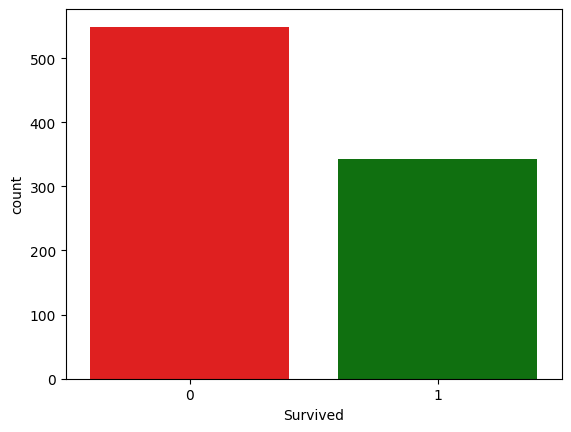

In [15]:
# Survived col
sns.countplot(x = df_train['Survived'] , palette=['red','green'])

death_percent = round((df_train['Survived'].value_counts().values[0]/891)*100)

print(f"{death_percent}% People out of 891 Died in Accident")

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\3613123790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df_train['Pclass'], palette=['blue','orange','green'])


<Axes: xlabel='Pclass', ylabel='count'>

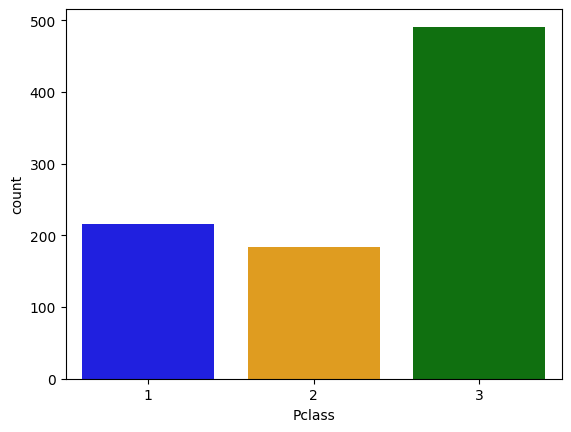

In [16]:
print((df_train['Pclass'].value_counts()/891)*100)
sns.countplot(x = df_train['Pclass'], palette=['blue','orange','green'])

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

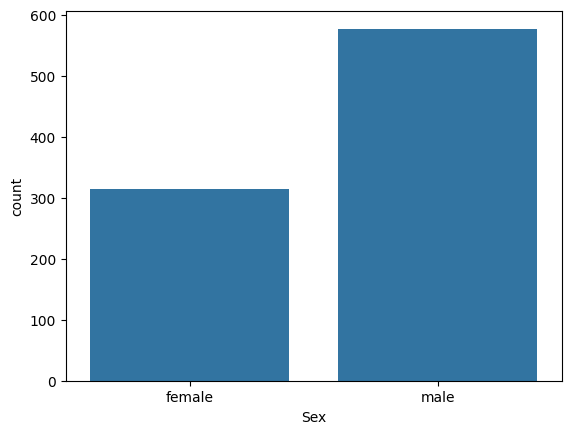

In [17]:
# Gender
print((df_train['Sex'].value_counts()/891)*100)

sns.countplot(x = df_train['Sex'])

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

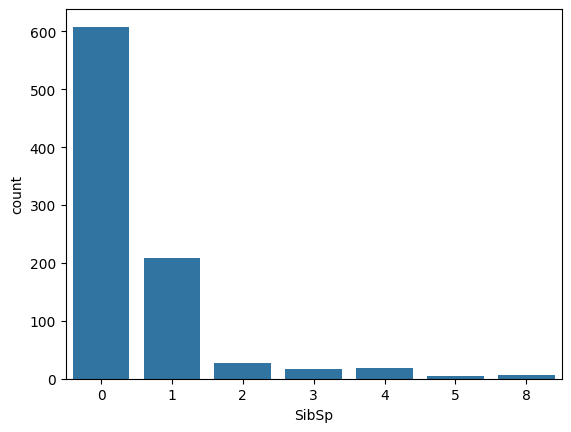

In [18]:
# SibSp
print((df_train['SibSp'].value_counts()/891)*100)

sns.countplot(x = df_train['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

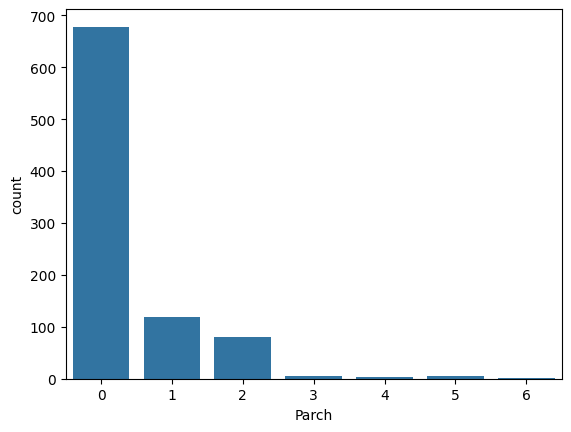

In [19]:
# Parch
print((df_train['Parch'].value_counts()/891)*100)

sns.countplot(x = df_train['Parch'])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

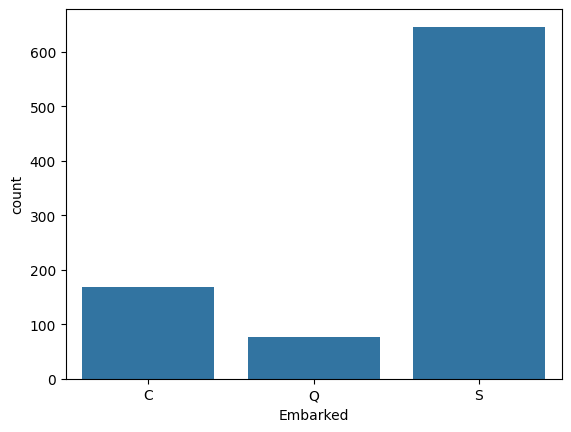

In [20]:
# Embarked
print((df_train['Embarked'].value_counts()/891)*100)

sns.countplot(x = df_train['Embarked'])

0.45956263424701577
0.9865867453652877


C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\884577932.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'])


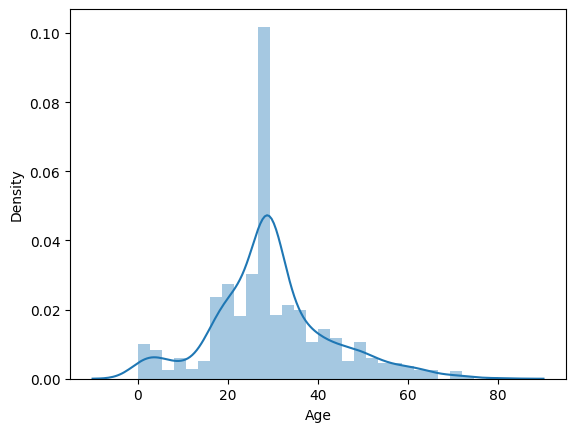

In [21]:
# Age column
sns.distplot(df_train['Age'])

print(df_train['Age'].skew())
print(df_train['Age'].kurt())

<Axes: xlabel='Age'>

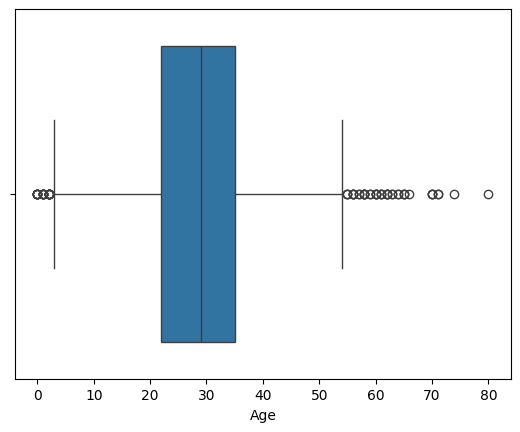

In [22]:
sns.boxplot(x=df_train['Age'])

In [23]:
print("People with age in between 60 and 70 are", df_train[(df_train['Age']>60) & (df_train['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are", df_train[(df_train['Age'] >=70) & (df_train['Age']<=75)].shape[0])
print("People with age greater than 75 are", df_train[df_train['Age']>75].shape[0])
print('-' *50)
print("People with age between 0 and 1",df_train[df_train['Age'] <1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\835740864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

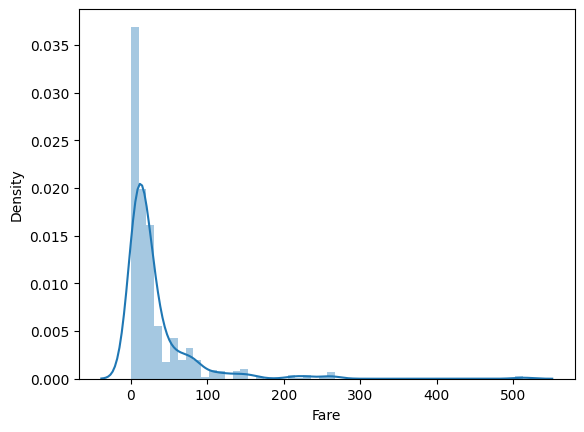

In [24]:
# Fare column
sns.distplot(df_train['Fare'])

<Axes: xlabel='Fare'>

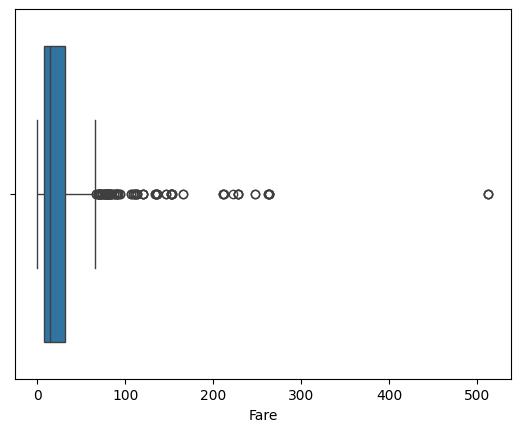

In [25]:
sns.boxplot(x=df_train['Fare'])

In [26]:
print("People with fare between $200 and $300",df_train[(df_train['Fare']>200) & (df_train['Fare']<300)].shape[0])
print("People with fare greater than $300",df_train[(df_train['Fare']>300)].shape[0])

People with fare between $200 and $300 17
People with fare greater than $300 3


### **Conclusion**
- High skewed data and most of ther people have cheaper tickets
- there are lots of outlier in the data

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


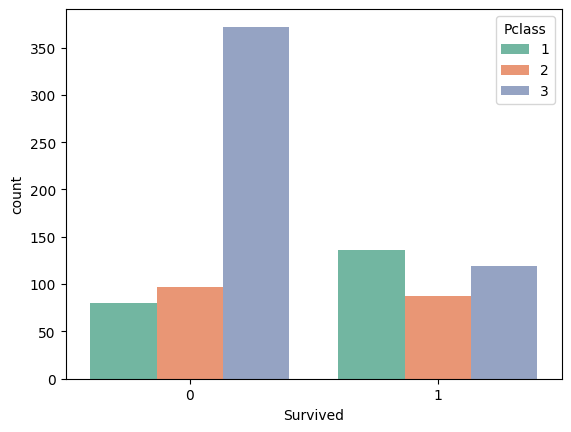

In [27]:
# Survival with Pclass

sns.countplot(x='Survived', hue='Pclass', data=df_train, palette='Set2')

pd.crosstab(df_train['Pclass'],df_train['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


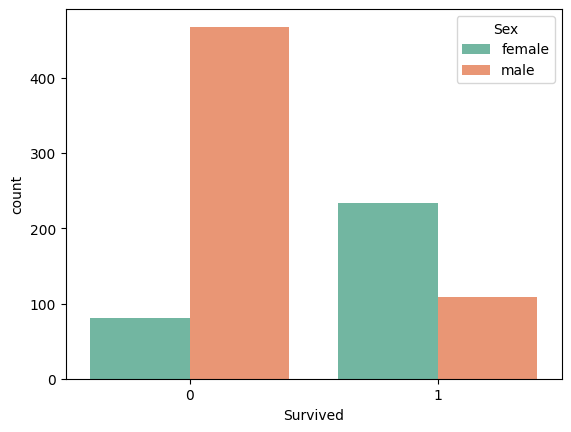

In [28]:
# Survival with Gender

sns.countplot(x='Survived', hue='Sex', data=df_train, palette='Set2')

pd.crosstab(df_train['Sex'],df_train['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


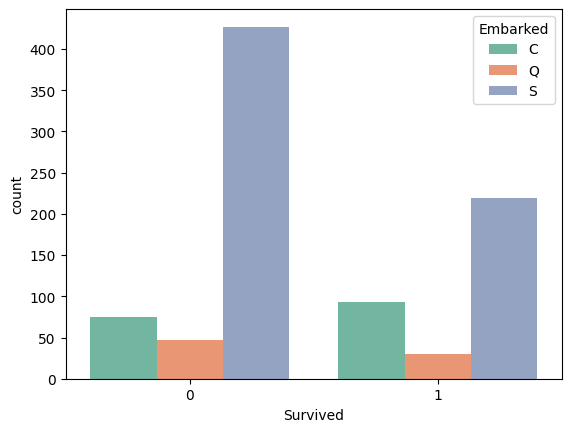

In [29]:
# Survived with Embarked

sns.countplot(x='Survived', hue='Embarked', data=df_train, palette='Set2')

pd.crosstab(df_train['Embarked'],df_train['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\2057599271.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Survived']==0]['Age'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\2057599271.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Survived']==1

<Axes: xlabel='Age', ylabel='Density'>

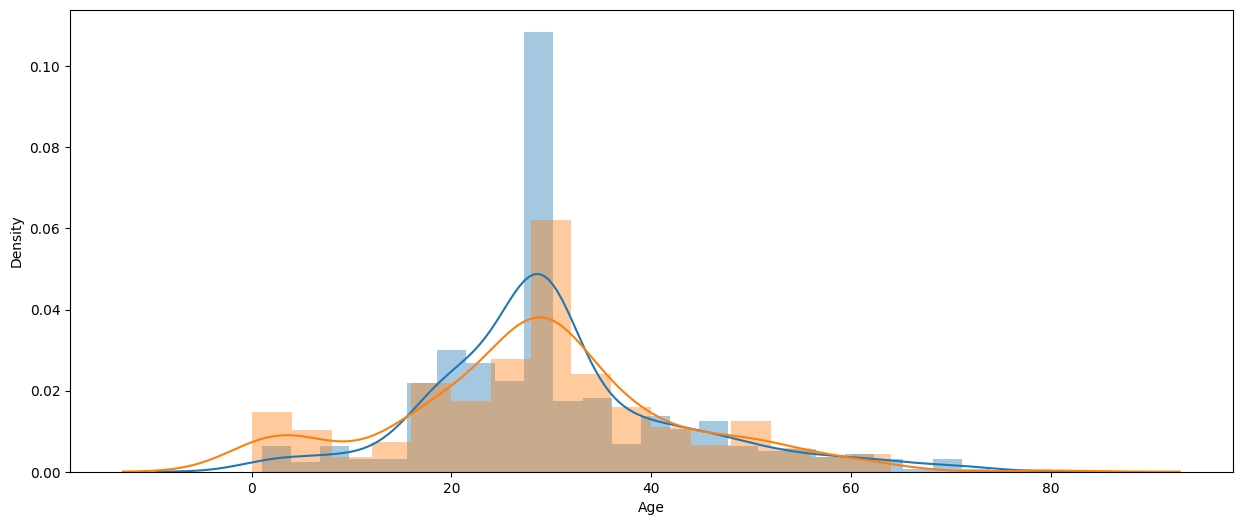

In [30]:
# Survived with Age

plt.figure(figsize=(15,6))

sns.distplot(df_train[df_train['Survived']==0]['Age'])
sns.distplot(df_train[df_train['Survived']==1]['Age'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\2707190825.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Survived']==0]['Fare'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_3904\2707190825.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Survived']==

<Axes: xlabel='Fare', ylabel='Density'>

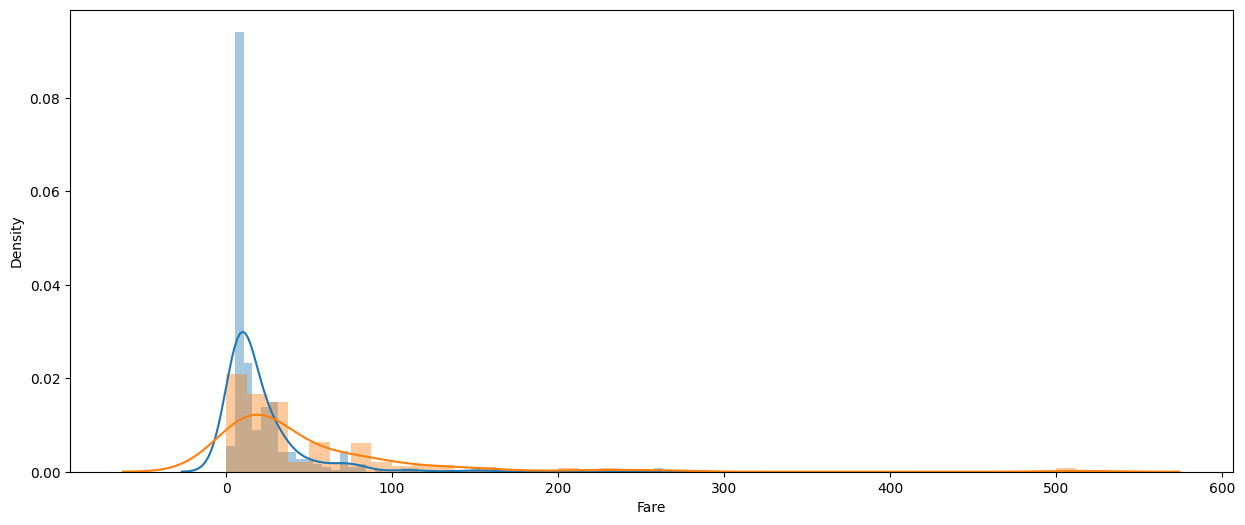

In [31]:
# Survived with Fare

plt.figure(figsize=(15,6))

sns.distplot(df_train[df_train['Survived']==0]['Fare'])
sns.distplot(df_train[df_train['Survived']==1]['Fare'])

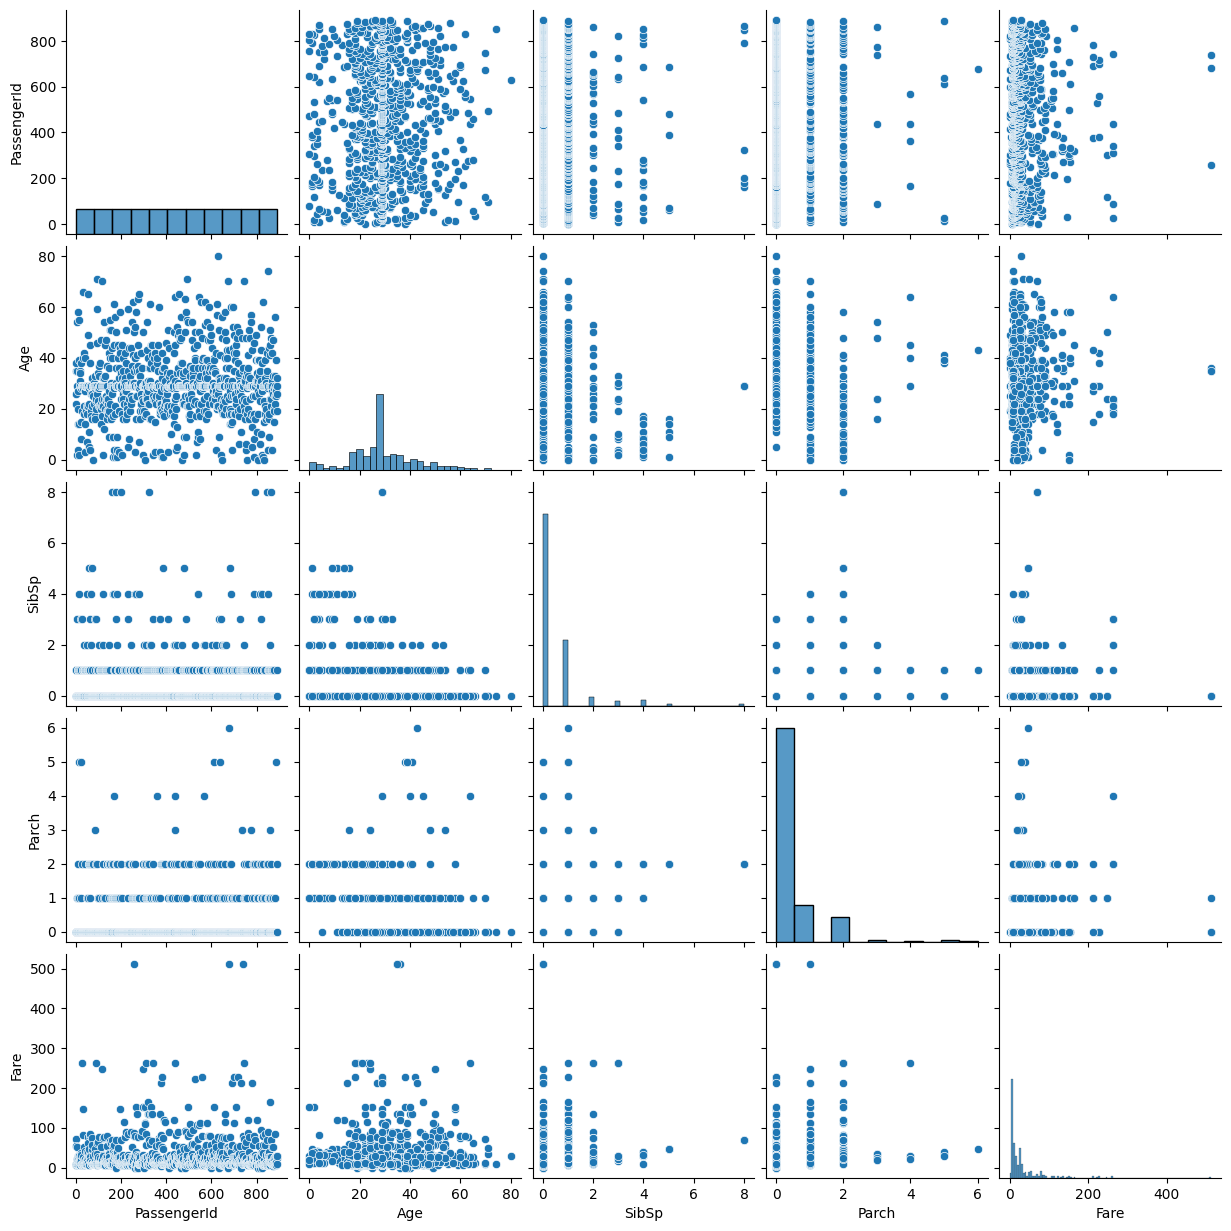

In [32]:
sns.pairplot(df_train)

<Axes: >

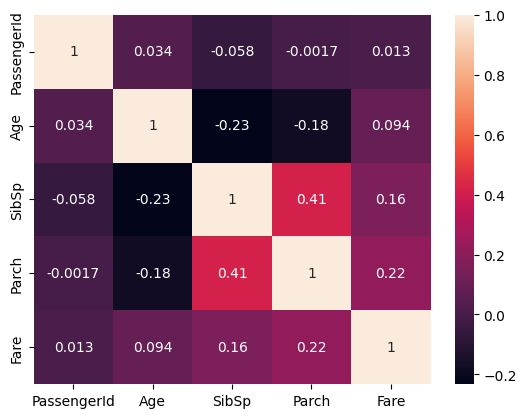

In [33]:
numerical_df = df_train.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(),annot=True)


In [38]:
#Family Size
df_train['family_size'] = df_train['Parch'] + df_train['SibSp']

In [43]:
def family_type(number):
    if number == 0:
        return 'Alone'
    elif number > 0 and number <= 4:
        return 'Medium'
    else:
        return 'Large'

In [48]:
df_train['family_type'] = df_train['family_size'].apply(family_type)

In [67]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,Alone


In [69]:
df_train.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [70]:
pd.crosstab(df_train['family_type'],df_train['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


<Axes: xlabel='family_type', ylabel='count'>

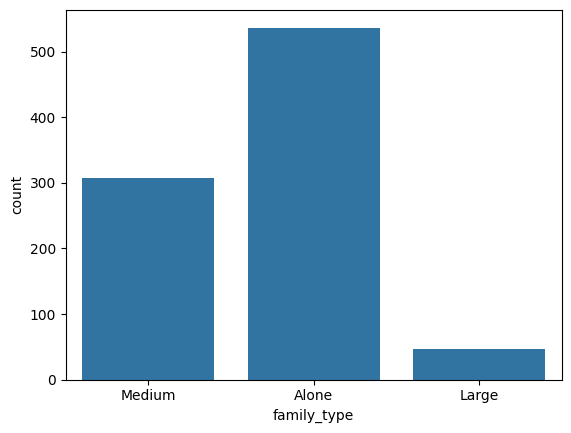

In [79]:
sns.countplot(x = df_train['family_type'])

### **Conclution**
- female's chance of survive is more than a male
- Travelline in Pclass 3 is risk of life
- who are going to C is Survived more
- people travelling with small families had a higher chances to survive  in compare to people who travel with large familes
- people with 20 to 40 age have a less chances to survive